## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

### **나.  학습데이터 불러오기**

In [58]:
data = pd.read_csv('train_dataset.csv')

In [4]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [59]:
data.drop('Unnamed: 0', axis=1, inplace=True)

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

## 결측치 존재 여부 및 조치 방안

In [6]:
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [7]:
data.loc[data['url_domain_len'].isnull()]

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
1084,37.0,2.0,0.0,NaN,37.0,2.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,211.0,1.0,1.0,2.0,122.0,0.0,benign


In [8]:
data.loc[data['url_path_len'].isnull()]

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
1628,24.0,0.0,NaN,14.0,14.0,4.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,benign


In [60]:
data = data.dropna(axis=0) # 결측치 데이터 행 2개 확인. 제거.

In [10]:
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

## 범주형 데이터라 생각되는 열 데이터 확인

In [11]:
# url_ip_present : URL내 IP표시 여부 -> 범주 0,1 ( 참이 1, 거짓이 0 )
# url_entropy : URL 복잡도 -> 범주가 아니네...
# url_chinese_present : URL내 중국어 표기 여부 -> 범주 그러나 모두 0 -> 삭제 필요.
# url_port : URL내 포트 표기 여부 -> 범주 0,1 1이 8개임.
data['url_port'].value_counts()

0.0    3654
1.0       8
Name: url_port, dtype: int64

In [61]:
data.drop('url_chinese_present', axis=1, inplace=True) # url_chinese_present 데이터 모두 0라서 삭제.

In [13]:
pd.set_option('display.max_columns', None)

In [62]:
data.drop("html_num_tags('applet')", axis=1, inplace=True) # html_num_tags('applet') 데이터 모두 0라서 삭제.

In [63]:
data.describe()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
count,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000
mean,54.572365,0.412616,29.373839,20.385035,20.327690,2.516658,0.272802,4.710268,0.104315,0.060623,4.228548,0.002185,0.220918,8.787275,0.018023,0.028946,70.824959,0.998088,1.016658,1.028946,66.185691
std,82.513738,0.846855,78.604482,9.597743,9.626212,1.534319,1.124881,25.324960,0.574461,0.238669,0.393160,0.046695,0.898613,12.650442,0.144847,0.237746,365.683940,0.145013,0.225392,1.564155,342.742054
min,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.983196,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000
50%,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.189561,0.000000,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000
75%,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.459800,0.000000,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000
max,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,1.000000,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000


In [16]:
## 변수 단변량 확인

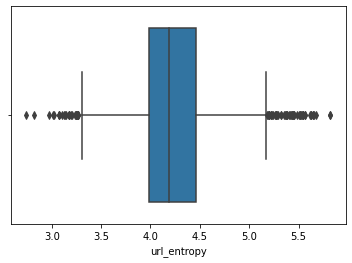

In [17]:
sns.boxplot(data['url_entropy'])
plt.show()

In [18]:
data.loc[data['url_entropy'] > (4.459800 + (4.459800-3.983196)*1.5)].shape # IQR*1.5 + 75%값보다 큰 값의 개수 확인

(54, 22)

In [19]:
data.loc[data['url_entropy'] < (4.459800 - (4.459800-3.983196)*1.5)].shape # 25%값 - IQR*1.5보다 작은 값의 개수 확인

(324, 22)

In [20]:
data['url_path_len'].describe()

count    3662.000000
mean       29.373839
std        78.604482
min         0.000000
25%         1.000000
50%        13.000000
75%        31.000000
max      1816.000000
Name: url_path_len, dtype: float64

In [21]:
def getIQR(data, columns):
    min = np.percentile(data[columns], 25)
    max = np.percentile(data[columns], 75)
    return (max-min)

In [22]:
a = getIQR(data, 'url_path_len')*1.8+np.percentile(data['url_path_len'], 75)
data.loc[data['url_path_len'] > a].shape

(236, 22)

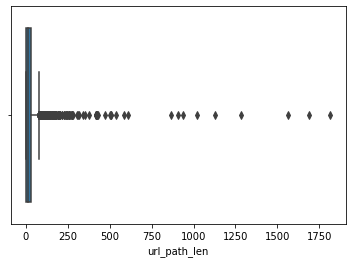

In [23]:
sns.boxplot(data['url_path_len'])
plt.show()

In [24]:
data["html_num_tags('form')"].describe()

count    3662.000000
mean        1.028946
std         1.564155
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        57.000000
Name: html_num_tags('form'), dtype: float64

In [25]:
a = getIQR(data, "html_num_tags('form')")*1.5+np.percentile(data["html_num_tags('form')"], 75)
data.loc[data["html_num_tags('form')"] > a].shape

(250, 22)

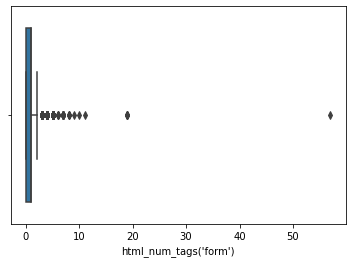

In [26]:
sns.boxplot(data["html_num_tags('form')"])
plt.show()

In [27]:
data['url_query_len'].value_counts()

0.0      3434
41.0       50
157.0      21
5.0        12
11.0        8
         ... 
271.0       1
312.0       1
42.0        1
71.0        1
43.0        1
Name: url_query_len, Length: 78, dtype: int64

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [109]:
data2 = data.replace({'malicious' : 0, 'benign' : 1})

<AxesSubplot:xlabel='url_len', ylabel='Density'>

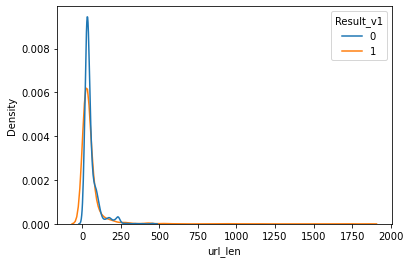

In [65]:
sns.kdeplot(x='url_len', data= data2, hue='Result_v1')

In [75]:
columns = ['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len', 'url_hostname_len', 'url_num_dots',
          'url_num_underscores', 'url_query_len', 'url_num_query_para', 'url_entropy', "html_num_tags('iframe')",
         "html_num_tags('script')", "html_num_tags('embed')", "html_num_tags('object')", "html_num_tags('div')",
          "html_num_tags('head')", "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')" ]

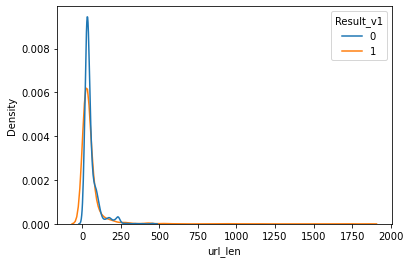

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_len    0.932637
dtype: float64
-----------------------------------


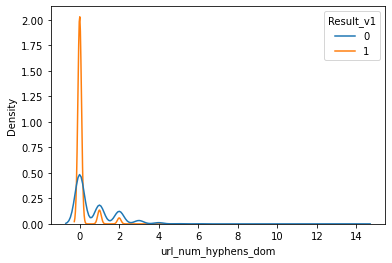

Optimization terminated successfully.
         Current function value: 0.631764
         Iterations 6
url_num_hyphens_dom    1.208474e-61
dtype: float64
-----------------------------------


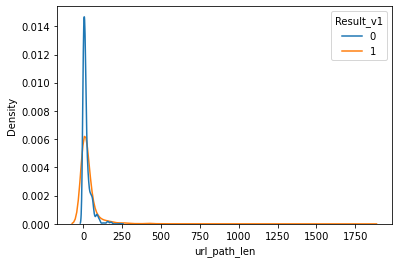

Optimization terminated successfully.
         Current function value: 0.686528
         Iterations 5
url_path_len    4.907666e-09
dtype: float64
-----------------------------------


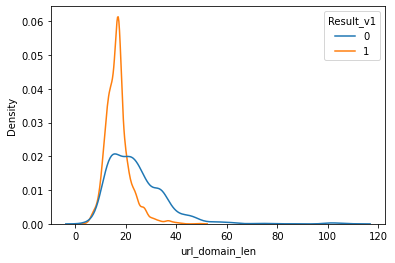

Optimization terminated successfully.
         Current function value: 0.681897
         Iterations 4
url_domain_len    3.815200e-19
dtype: float64
-----------------------------------


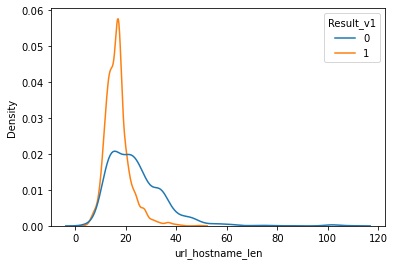

Optimization terminated successfully.
         Current function value: 0.681520
         Iterations 4
url_hostname_len    1.028186e-19
dtype: float64
-----------------------------------


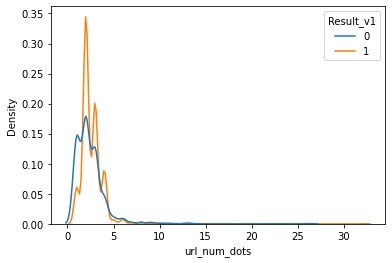

Optimization terminated successfully.
         Current function value: 0.692513
         Iterations 3
url_num_dots    0.031656
dtype: float64
-----------------------------------


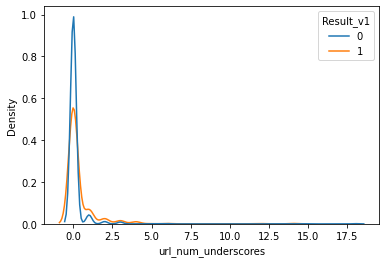

Optimization terminated successfully.
         Current function value: 0.682097
         Iterations 6
url_num_underscores    4.394527e-13
dtype: float64
-----------------------------------


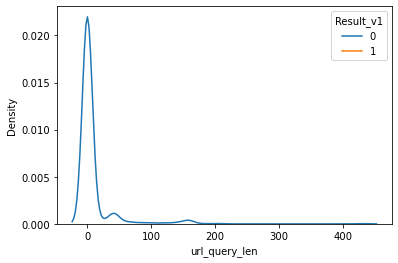

         Current function value: 0.649991
         Iterations: 35
url_query_len    0.999577
dtype: float64
-----------------------------------


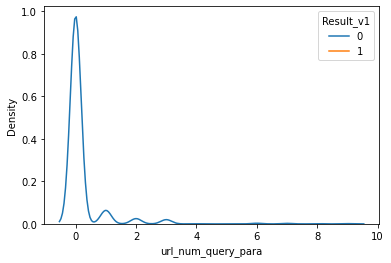

         Current function value: 0.656616
         Iterations: 35
url_num_query_para    0.997772
dtype: float64
-----------------------------------


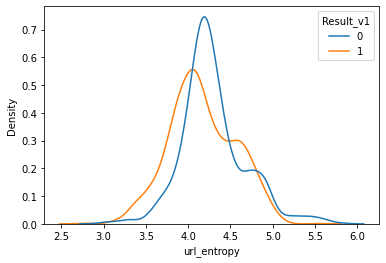

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.915585
dtype: float64
-----------------------------------


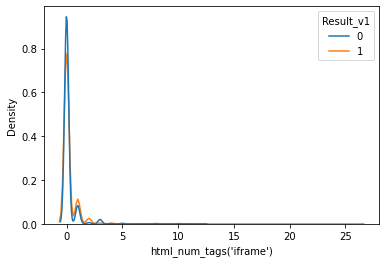

Optimization terminated successfully.
         Current function value: 0.692840
         Iterations 4
html_num_tags('iframe')    0.146136
dtype: float64
-----------------------------------


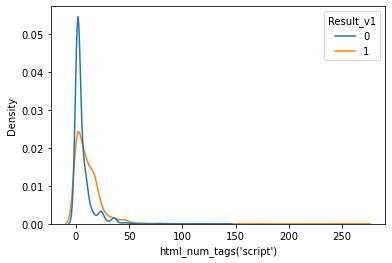

Optimization terminated successfully.
         Current function value: 0.676166
         Iterations 5
html_num_tags('script')    1.359310e-24
dtype: float64
-----------------------------------


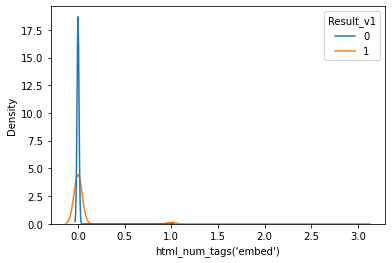

Optimization terminated successfully.
         Current function value: 0.685425
         Iterations 7
html_num_tags('embed')    3.335172e-07
dtype: float64
-----------------------------------


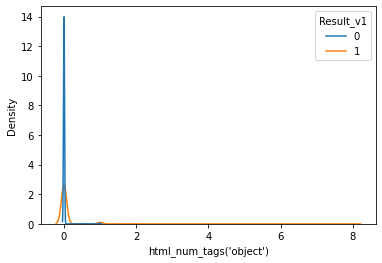

Optimization terminated successfully.
         Current function value: 0.683452
         Iterations 7
html_num_tags('object')    4.489999e-09
dtype: float64
-----------------------------------


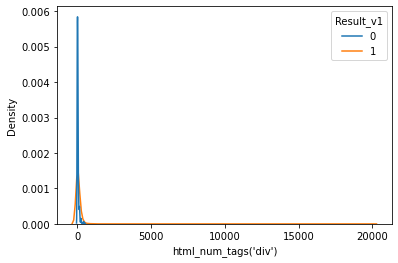

Optimization terminated successfully.
         Current function value: 0.684391
         Iterations 6
html_num_tags('div')    4.049643e-12
dtype: float64
-----------------------------------


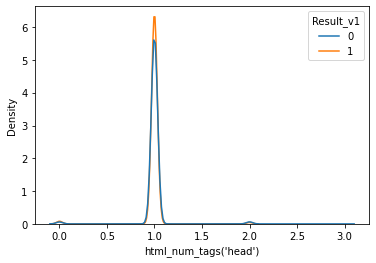

Optimization terminated successfully.
         Current function value: 0.693097
         Iterations 3
html_num_tags('head')    0.544368
dtype: float64
-----------------------------------


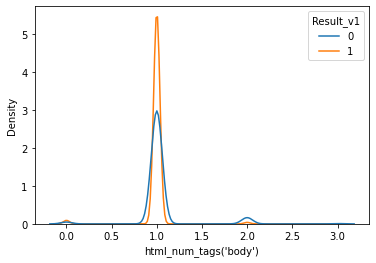

Optimization terminated successfully.
         Current function value: 0.693089
         Iterations 3
html_num_tags('body')    0.515296
dtype: float64
-----------------------------------


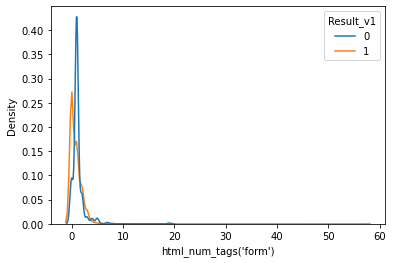

Optimization terminated successfully.
         Current function value: 0.687675
         Iterations 5
html_num_tags('form')    2.788460e-09
dtype: float64
-----------------------------------


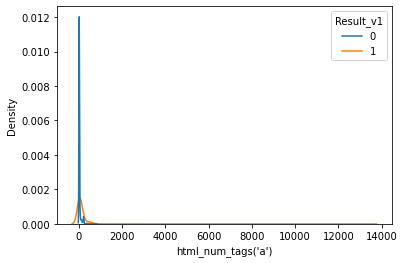

Optimization terminated successfully.
         Current function value: 0.651212
         Iterations 7
html_num_tags('a')    3.411547e-39
dtype: float64
-----------------------------------


In [110]:
pvalues = []

for column in columns:
    sns.kdeplot(x=column, data=data2, hue='Result_v1')
    plt.show()
    model = sm.Logit(data2['Result_v1'], data2[column])
    result = model.fit()
    print(result.pvalues)
    pvalues.append(result.pvalues[0])
    print('-'*35)

In [84]:
pval = pd.DataFrame({'Columns': columns, 'P-values' : pvalues})

In [89]:
col = list(pval.loc[pval['P-values'] >= 0.05]['Columns'])

In [90]:
col

['url_len',
 'url_query_len',
 'url_num_query_para',
 'url_entropy',
 "html_num_tags('iframe')",
 "html_num_tags('head')",
 "html_num_tags('body')"]

In [81]:
model = sm.Logit(data2['Result_v1'], data2['url_len'])
result = model.fit()
print(result.pvalues[0])
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
0.9326365799988001
url_len    0.932637
dtype: float64


In [67]:
model = sm.Logit(data2['Result_v1'], data2['url_num_hyphens_dom'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.631764
         Iterations 6
url_num_hyphens_dom    1.208474e-61
dtype: float64


In [ ]:
model = sm.Logit(data2['Result_v1'], data2['url_len'])
result = model.fit()
print(result.pvalues)

1. URL 복잡도(url_entropy)와 악성사이트(Result_v1)는 관계가 있는가?

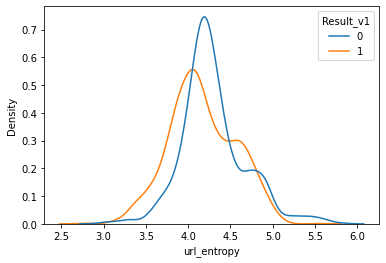

In [45]:
sns.kdeplot(x='url_entropy', data = data2, hue ='Result_v1')
plt.show()

In [46]:
model = sm.Logit(data2['Result_v1'], data2['url_entropy'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.915585
dtype: float64


2. URL 경로 길이(url_path_len)와 악성사이트(Result_v1)는 관계가 있는가?

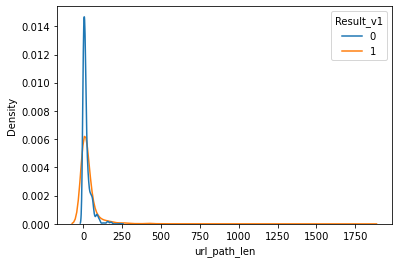

In [31]:
sns.kdeplot(x='url_path_len', data = data2, hue ='Result_v1')
plt.show()

In [32]:
model = sm.Logit(data2['Result_v1'], data2['url_path_len'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.686528
         Iterations 5
url_path_len    4.907666e-09
dtype: float64


3. form의 개수(html_num_tags('form'))와 악성사이트(Result_v1)는 관계가 있는가?

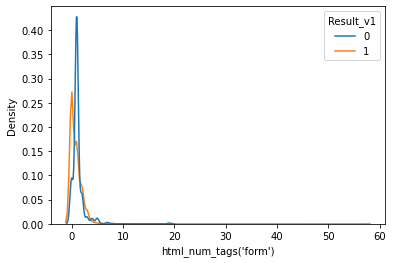

In [33]:
sns.kdeplot(x="html_num_tags('form')", data=data2, hue='Result_v1')
plt.show()

In [34]:
model = sm.Logit(data2['Result_v1'], data2["html_num_tags('form')"])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687675
         Iterations 5
html_num_tags('form')    2.788460e-09
dtype: float64


4. URL내 IP표시 여부(url_ip_present)와 악성사이트(Result_v1)는 관계가 있는가?

In [49]:
table = pd.crosstab(data2['Result_v1'], data2['url_ip_present'])

In [107]:
table = pd.crosstab(data2['Result_v1'], data2['url_ip_present'])
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p-value : ', result[1])
print('자유도 : ', result[2])

카이제곱통계량 :  18.14669791504658
p-value :  2.045237649096632e-05
자유도 :  1


In [106]:
table = pd.crosstab(data2['Result_v1'], data2['url_port'])
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p-value : ', result[1])
print('자유도 : ', result[2])

카이제곱통계량 :  0.0
p-value :  1.0
자유도 :  1


# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [35]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3663
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3662 non-null   float64
 1   url_num_hyphens_dom      3662 non-null   float64
 2   url_path_len             3662 non-null   float64
 3   url_domain_len           3662 non-null   float64
 4   url_hostname_len         3662 non-null   float64
 5   url_num_dots             3662 non-null   float64
 6   url_num_underscores      3662 non-null   float64
 7   url_query_len            3662 non-null   float64
 8   url_num_query_para       3662 non-null   float64
 9   url_ip_present           3662 non-null   float64
 10  url_entropy              3662 non-null   float64
 11  url_port                 3662 non-null   float64
 12  html_num_tags('iframe')  3662 non-null   float64
 13  html_num_tags('script')  3662 non-null   float64
 14  html_num_tags('embed')  

In [36]:
columns = ['url_len','url_path_len','url_domain_len', 'url_hostname_len', 'url_num_dots','url_query_len','url_entropy']

In [37]:
data.loc[data.duplicated(columns, keep='first')]

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
48,17.0,0.0,0.0,17.0,17.0,2.0,0.0,0.0,0.0,0.0,4.084963,0.0,1.0,6.0,0.0,0.0,249.0,1.0,1.0,3.0,162.0,benign
79,17.0,0.0,0.0,17.0,17.0,2.0,0.0,0.0,0.0,0.0,3.970176,0.0,0.0,12.0,0.0,0.0,118.0,1.0,1.0,1.0,34.0,benign
114,19.0,0.0,0.0,19.0,19.0,2.0,0.0,0.0,0.0,0.0,4.056021,0.0,0.0,4.0,0.0,0.0,183.0,1.0,1.0,1.0,564.0,benign
126,14.0,0.0,8.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,4.027169,0.0,0.0,3.0,0.0,0.0,8.0,1.0,1.0,0.0,5.0,malicious
169,13.0,0.0,0.0,13.0,13.0,2.0,0.0,0.0,0.0,0.0,3.684184,0.0,0.0,18.0,0.0,0.0,219.0,1.0,1.0,1.0,344.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,14.0,0.0,0.0,14.0,14.0,2.0,0.0,0.0,0.0,0.0,3.689704,0.0,0.0,5.0,0.0,0.0,183.0,1.0,1.0,1.0,560.0,benign
3650,35.0,0.0,21.0,14.0,14.0,3.0,1.0,0.0,0.0,0.0,4.156219,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,benign
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,benign
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,malicious


In [93]:
#  columns의 열 데이터들이 중복되지 않은 값을 따로 가지고 온다.
data2 = data.loc[data.duplicated(columns, keep='first')==False]

In [94]:
# 데이터 프레임의 info를 확인합니다.
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3231 non-null   float64
 1   url_num_hyphens_dom      3231 non-null   float64
 2   url_path_len             3231 non-null   float64
 3   url_domain_len           3231 non-null   float64
 4   url_hostname_len         3231 non-null   float64
 5   url_num_dots             3231 non-null   float64
 6   url_num_underscores      3231 non-null   float64
 7   url_query_len            3231 non-null   float64
 8   url_num_query_para       3231 non-null   float64
 9   url_ip_present           3231 non-null   float64
 10  url_entropy              3231 non-null   float64
 11  url_port                 3231 non-null   float64
 12  html_num_tags('iframe')  3231 non-null   float64
 13  html_num_tags('script')  3231 non-null   float64
 14  html_num_tags('embed')  

In [40]:
data2["url_ip_present"].unique()

array([0., 1.])

In [53]:
data2["Result_v1"].unique()

array(['malicious', 'benign'], dtype=object)

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [ ]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [54]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
data2['Result_v1'].unique()

array(['malicious', 'benign'], dtype=object)

In [95]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
data2.replace({'malicious' : -1, 'benign' : 1}, inplace = True)



In [96]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
data2['Result_v1'].unique()
# -1은 악성사이트, 1은 정상사이트



array([-1,  1], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [ ]:
# 결축치의 존재를 확인합니다.



In [ ]:
# 결측치를 적절히 처리해줍니다.




In [ ]:
# 결축치의 존재를 확인합니다.



---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [98]:
data2.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1


In [99]:
# Result_v1과 p-value가 0.05 이상인 데이터들을 삭제.
data3 = data2.drop(col, axis=1)

In [104]:
data3.drop('url_port', axis=1, inplace=True)

In [100]:
data3.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,18.0,0.0,0.0,20.0,0.0,21.0,1
2,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,33.0,0.0,0.0,101.0,3.0,70.0,1
3,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,15.0,0.0,0.0,151.0,1.0,55.0,1
4,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,332.0,0.0,321.0,1


In [105]:
data3.to_csv('My_dataset.csv')

In [102]:
data2.to_csv('before_my_dataset.csv')

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>